In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kevinbrundler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kevinbrundler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kevinbrundler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
sdg_goals = {1: "No Poverty",
             2: "Zero hunger (No hunger)",
             3: "Good health and well-being",
             4: "Quality education",
             5: "Gender equality",
             6: "Clean water and sanitation",
             7: "Affordable and clean energy",
             8: "Decent work and economic growth",
             9: "Industry, Innovation and Infrastructure",
             10: "Reduced inequality",
             11: "Sustainable cities and communities",
             12: "Responsible consumption and production",
             13: "Climate action",
             14: "Life below water",
             15: "Life on land",
             16: "Peace, justice and strong institutions",
             17: "Strengthen the means of Implementation and revitalize the global Partnership for sustainable development goals"}


In [3]:
df = pd.read_csv('osdg.csv', delimiter='\t')
df = df[df.agreement >= 0.5]

def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


In [4]:
##################################
########## OSDG Dataset ##########
##################################

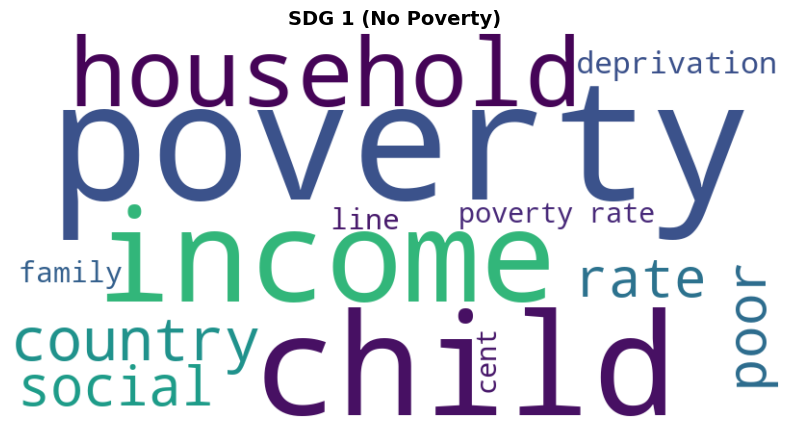

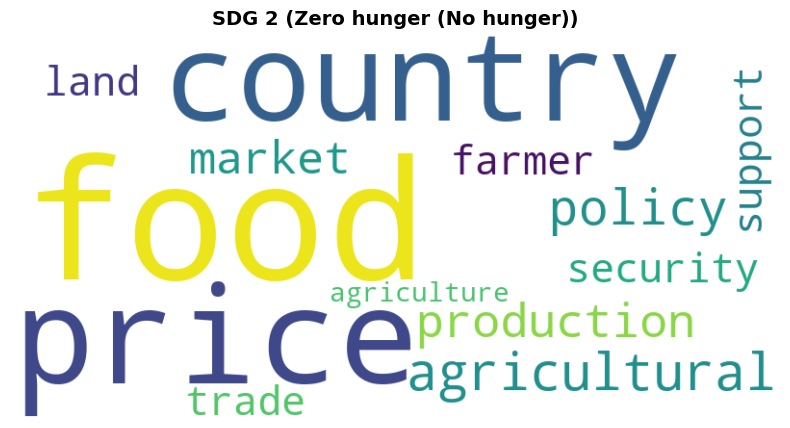

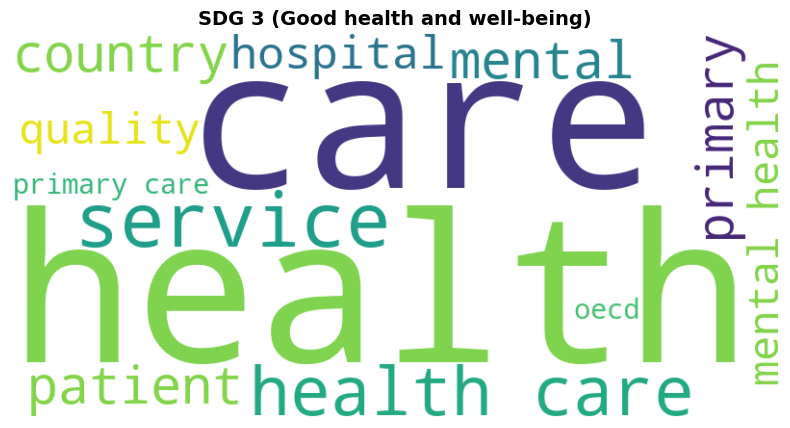

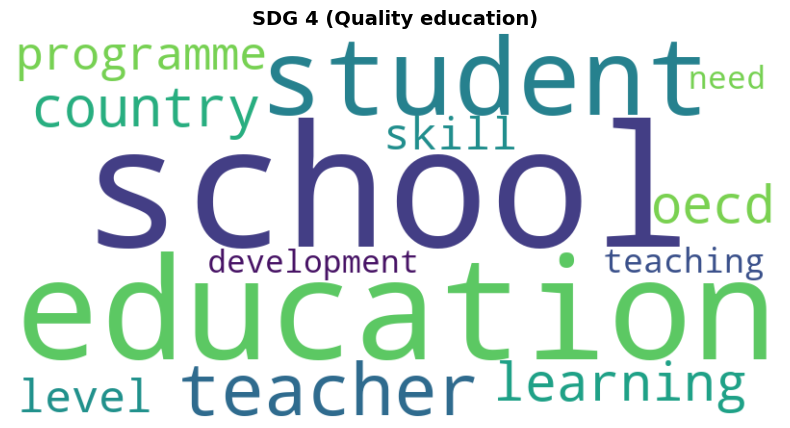

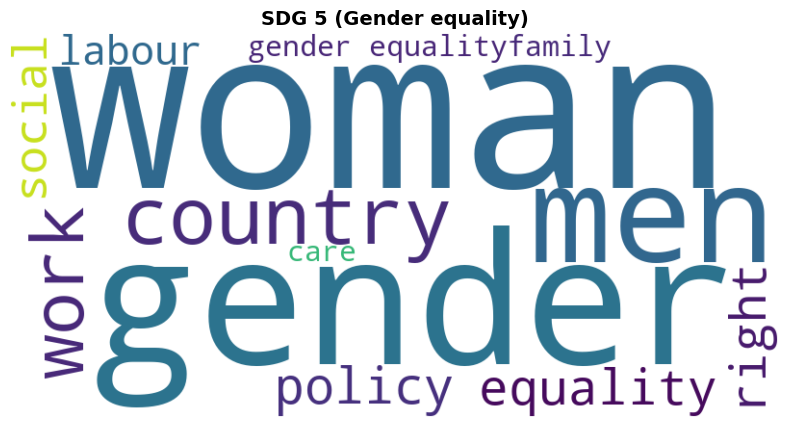

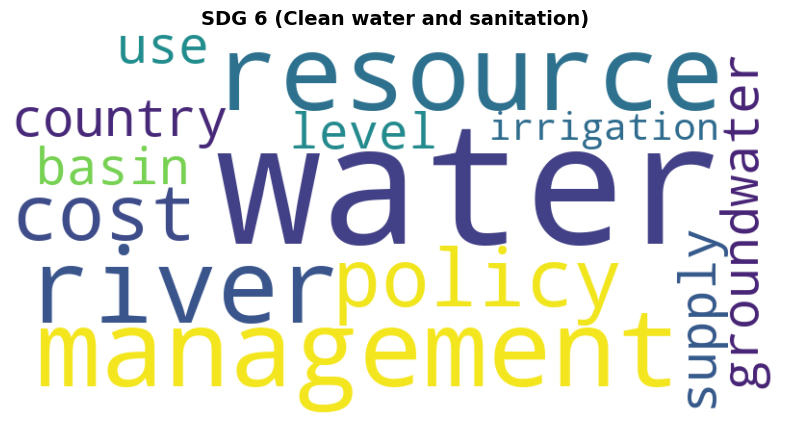

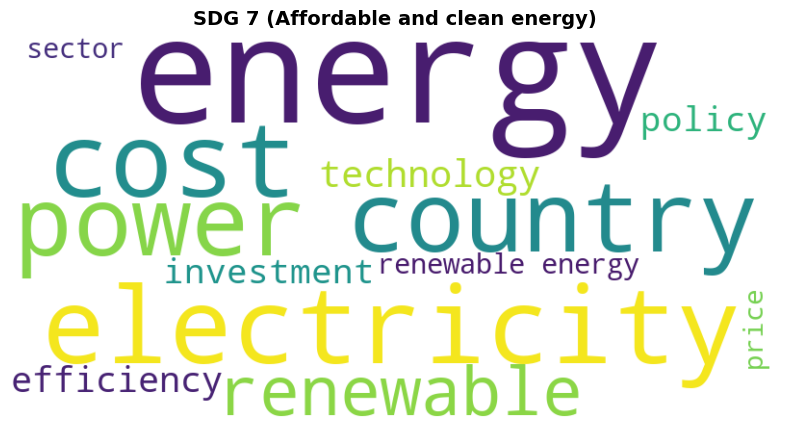

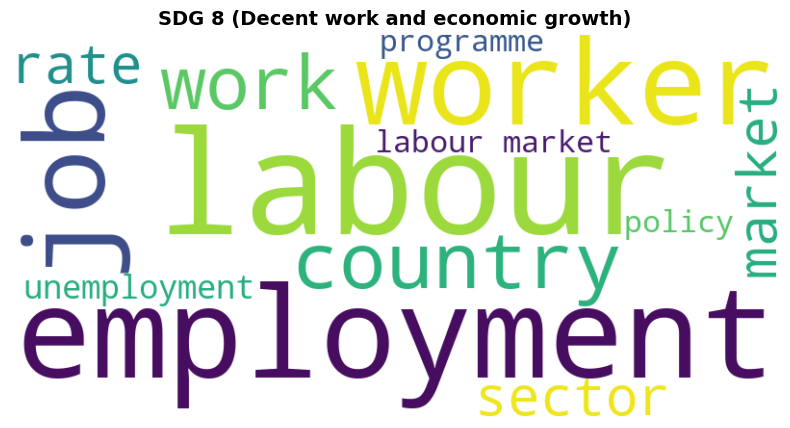

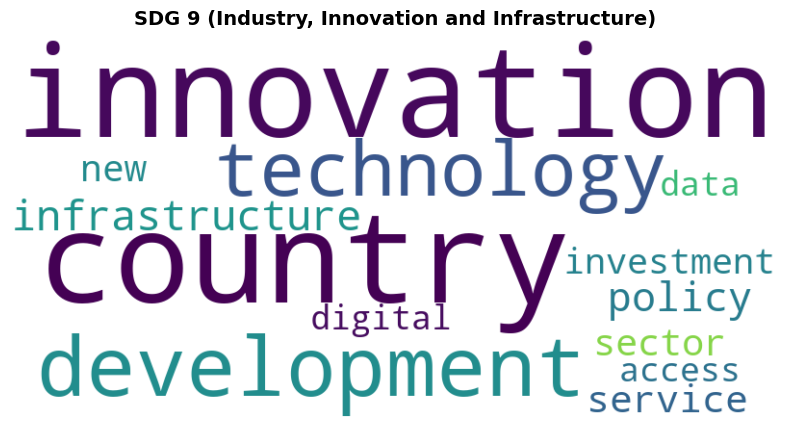

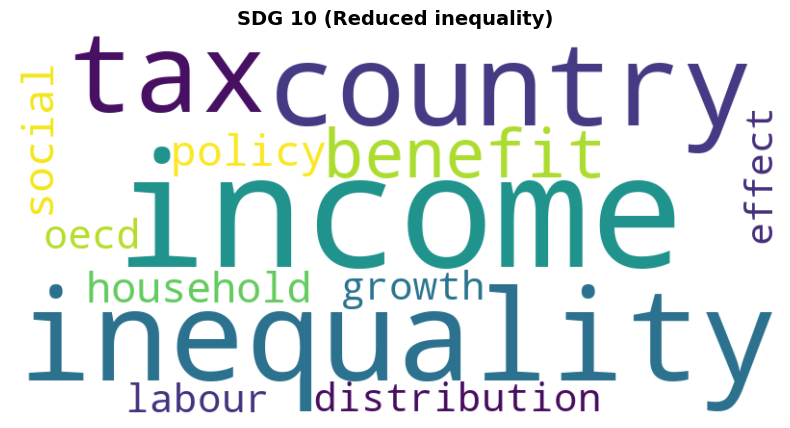

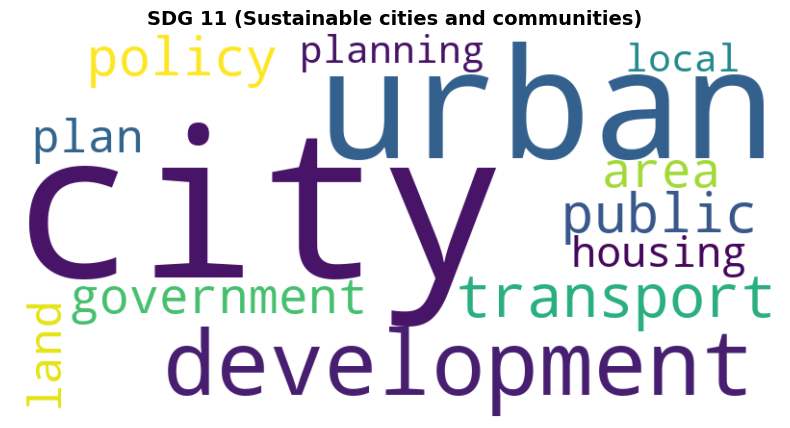

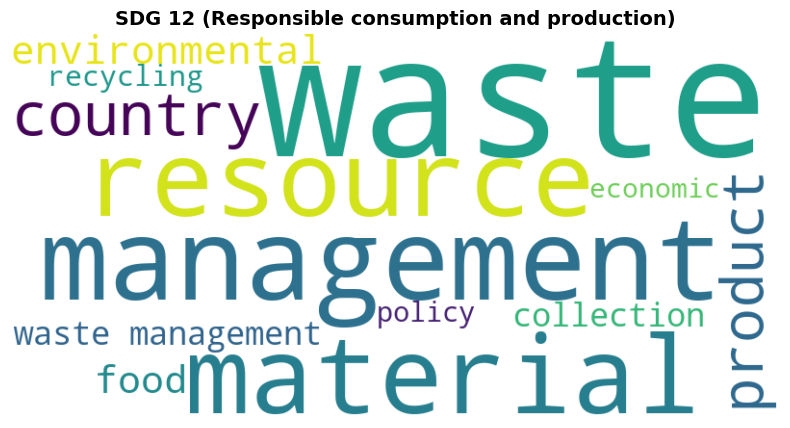

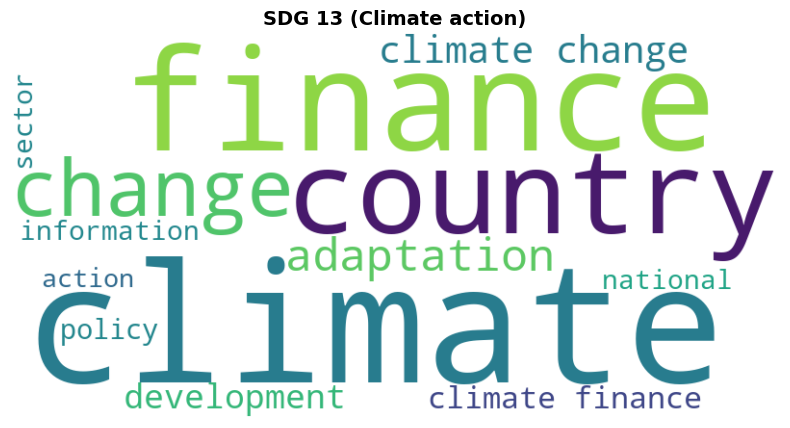

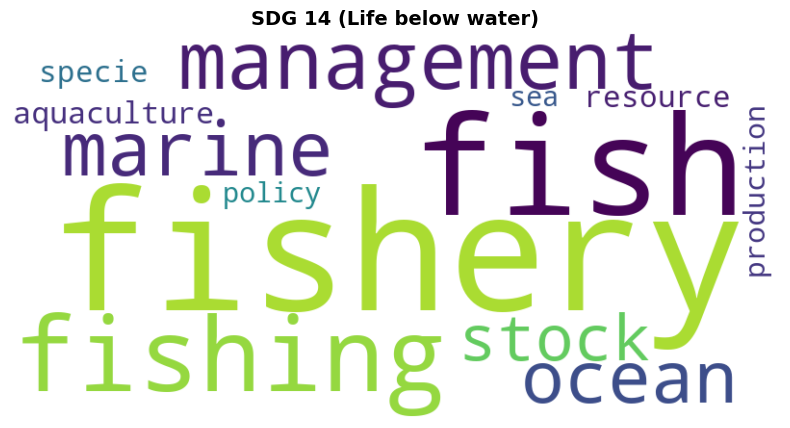

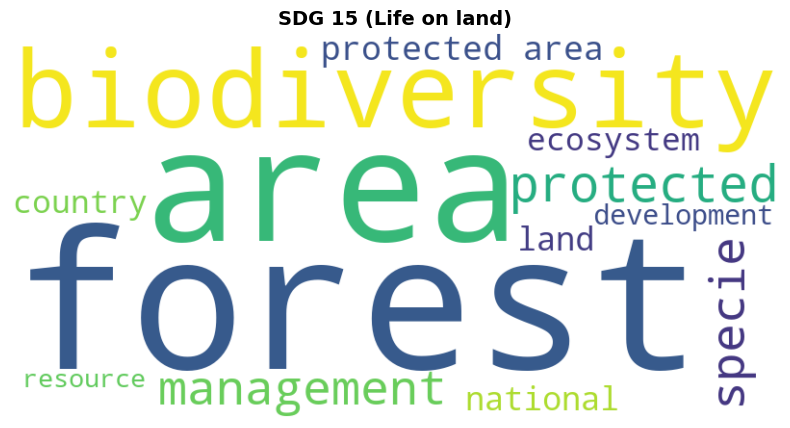

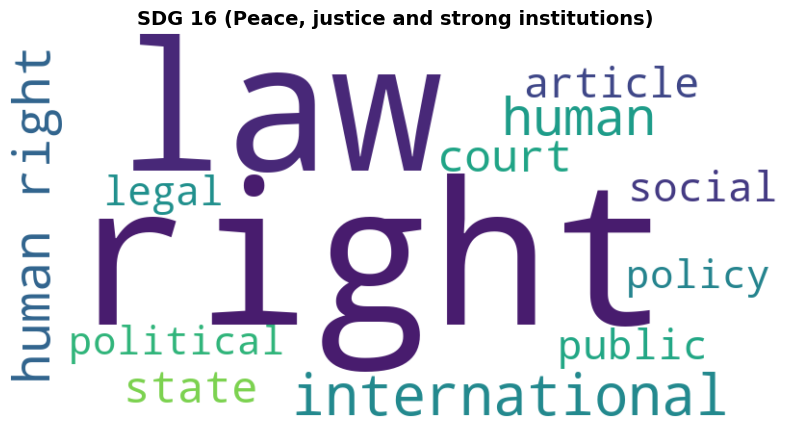

In [4]:
df['text_processed'] = df['text'].apply(preprocess)

grouped = df.groupby('sdg')

top_words_per_sdg = {}

for sdg, group in grouped:
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(group['text_processed'])

    # Apply NMF to extract topics
    nmf = NMF(n_components=1, random_state=42)
    nmf.fit(tfidf_matrix)

    # Extract features and weights
    feature_names = tfidf_vectorizer.get_feature_names_out()
    top_indices = nmf.components_[0].argsort()[:-13 - 1:-1]
    top_words = [feature_names[i] for i in top_indices]
    weights = nmf.components_[0][top_indices]

    word_freq = {word: weight for word, weight in zip(top_words, weights)}
    
    top_words_per_sdg[sdg] = top_words
    
    # Generate word clouds
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=50,
        relative_scaling=0.5
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"SDG {sdg} ({sdg_goals[sdg]})", fontsize=14, fontweight="bold")
    plt.axis("off")
    plt.show()

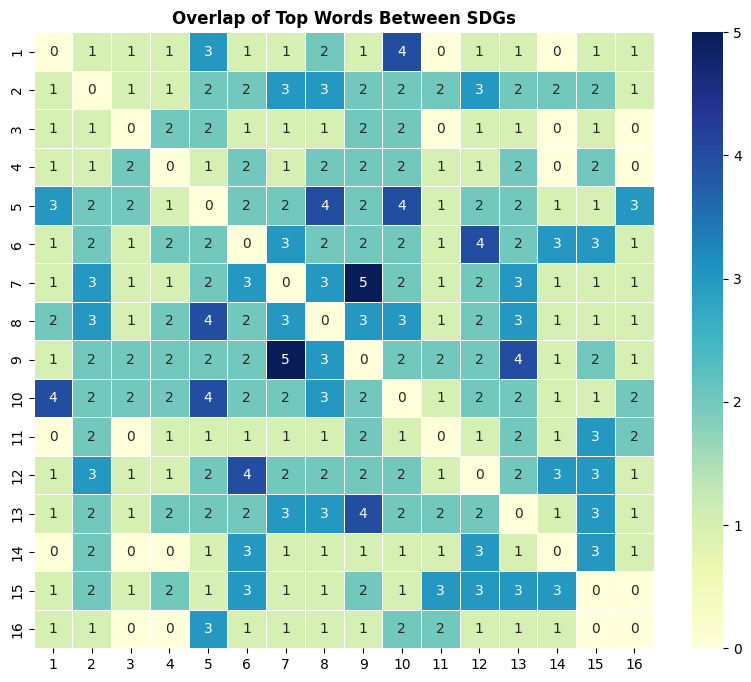

In [5]:
sdgs = list(top_words_per_sdg.keys())
overlap_matrix = pd.DataFrame(index=sdgs, columns=sdgs, dtype=object)

for sdg1 in sdgs:
    for sdg2 in sdgs:
        if sdg1 == sdg2:
            overlap_matrix.at[sdg1, sdg2] = None
        else:
            overlap_words = list(set(top_words_per_sdg[sdg1]) & set(top_words_per_sdg[sdg2]))
            overlap_matrix.at[sdg1, sdg2] = overlap_words


overlap_count_matrix = overlap_matrix.applymap(lambda x: len(x) if x is not None else 0)

plt.figure(figsize=(10, 8))
sns.heatmap(overlap_count_matrix, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Overlap of Top Words Between SDGs', fontweight="bold")
plt.show()

In [6]:
##################################
## Training Data for Swiss Text ##
##################################

In [7]:
df_train = pd.read_json('task1_train.jsonl', lines=True)
df_train.columns = [col.lower() for col in df_train.columns]
df_train = df_train[df_train.sdg > 0]

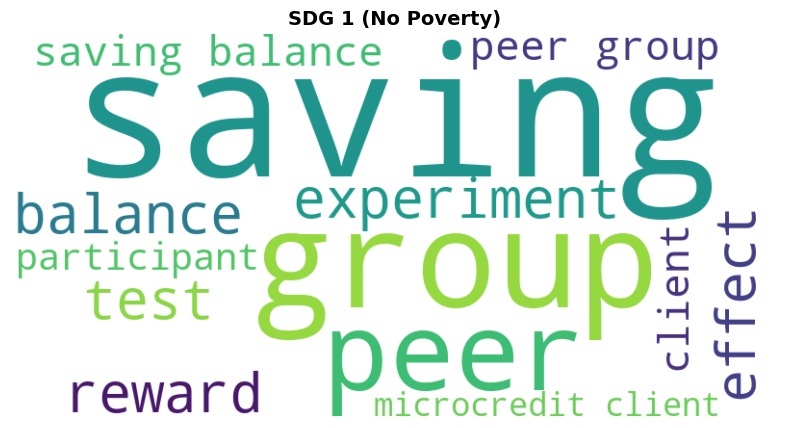

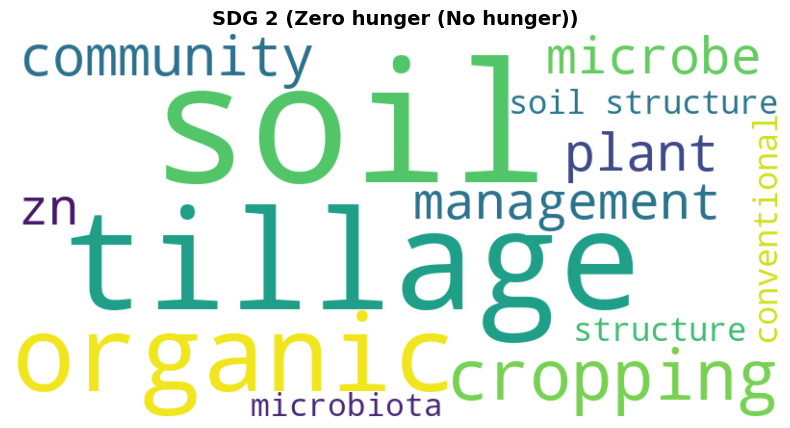

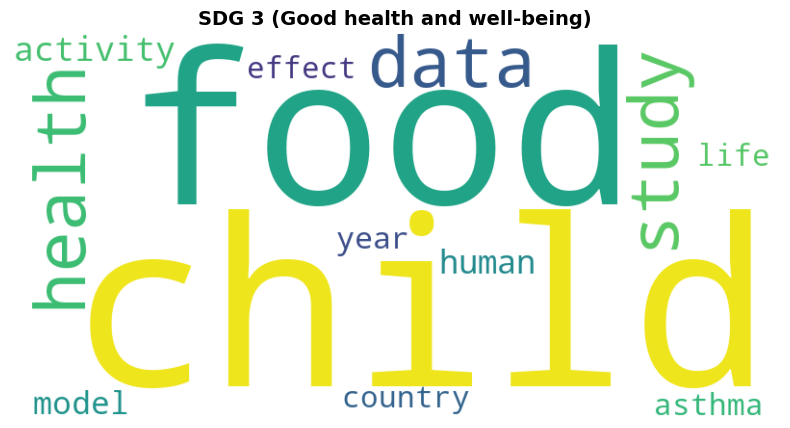

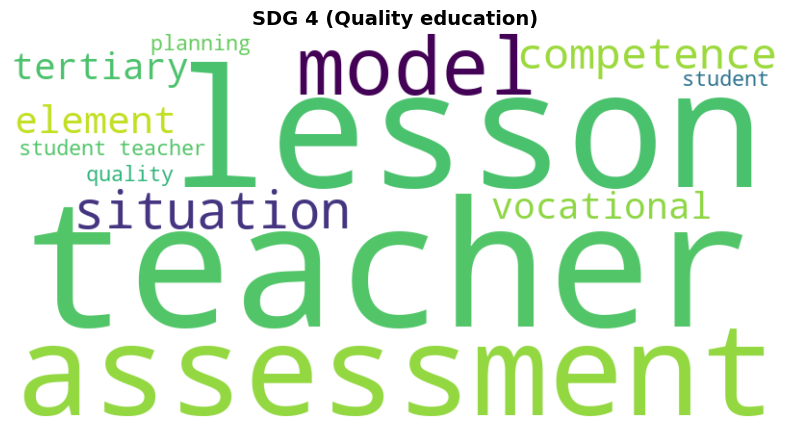

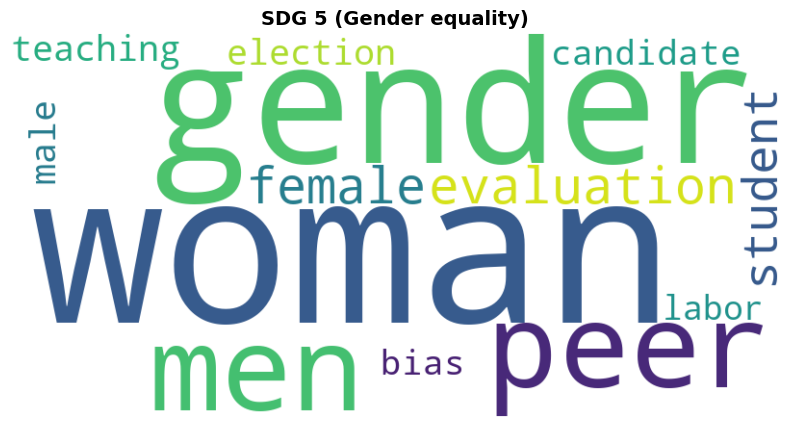

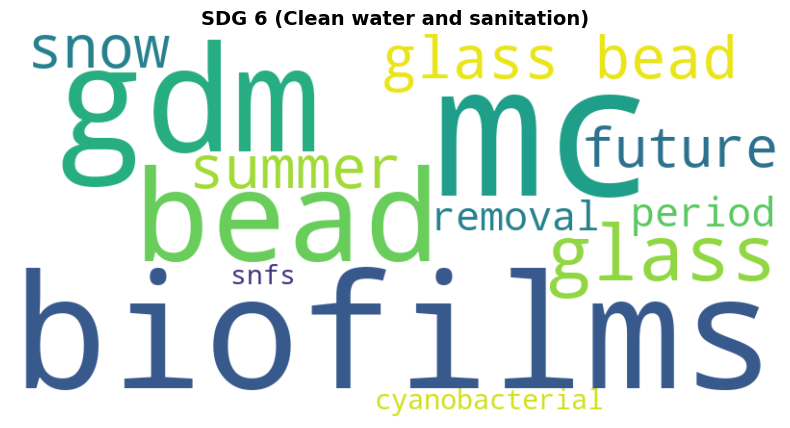

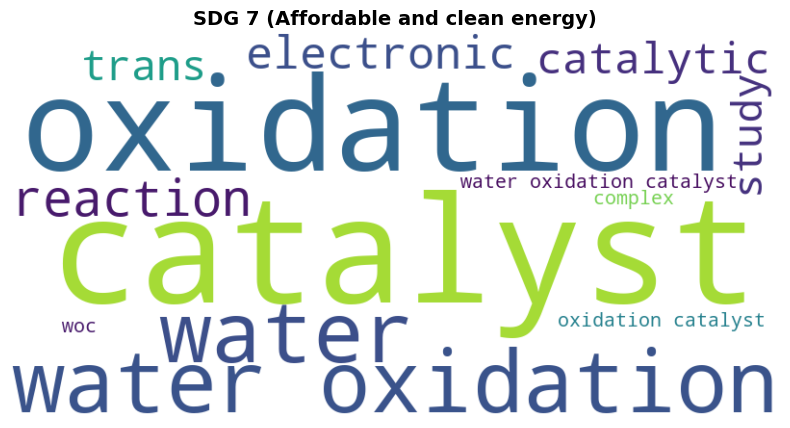

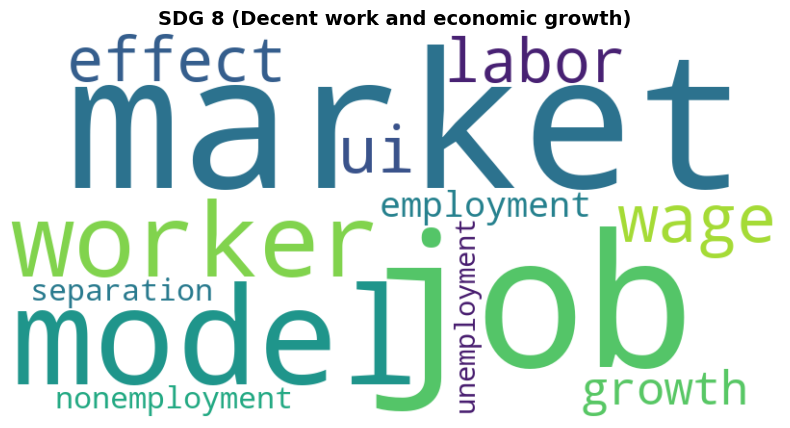

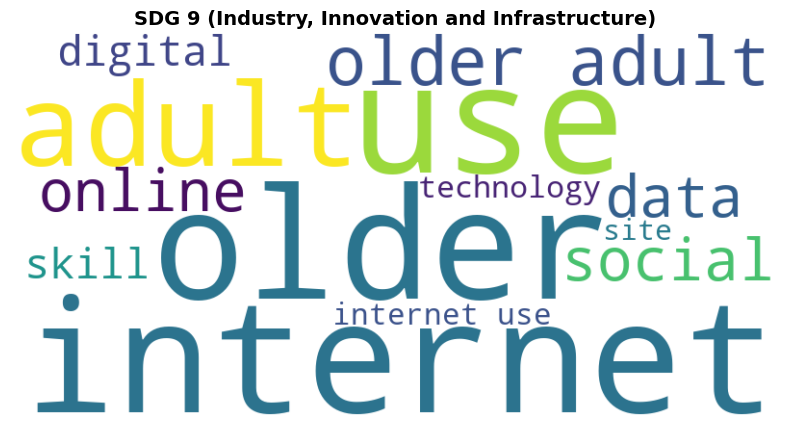

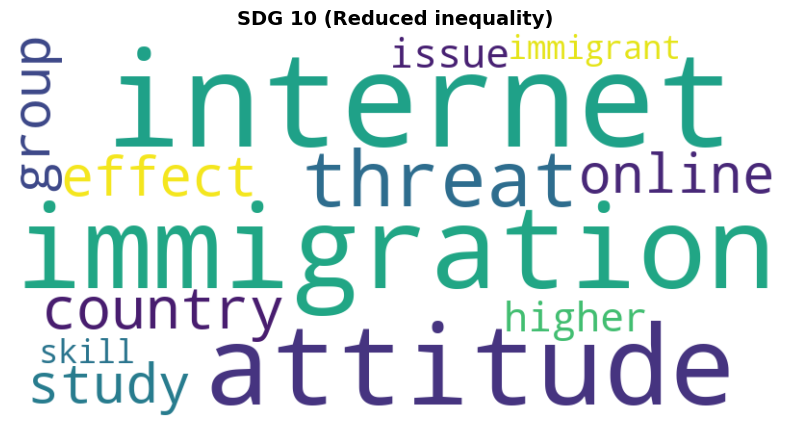

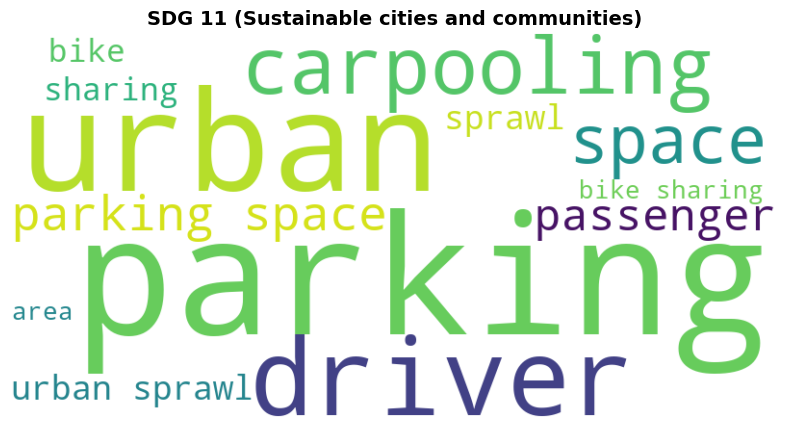

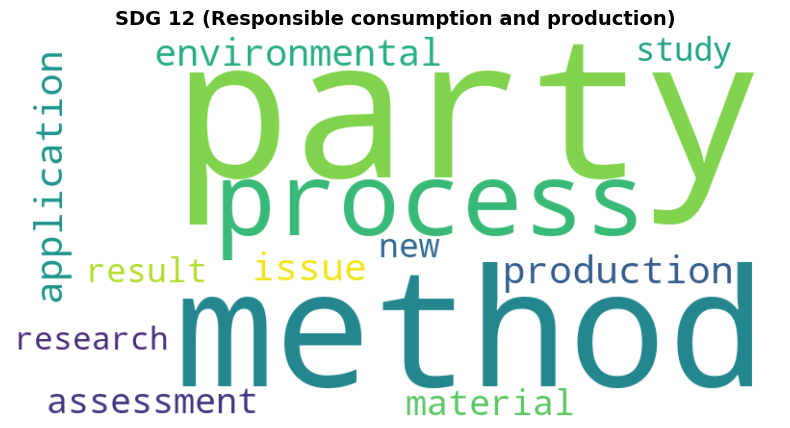

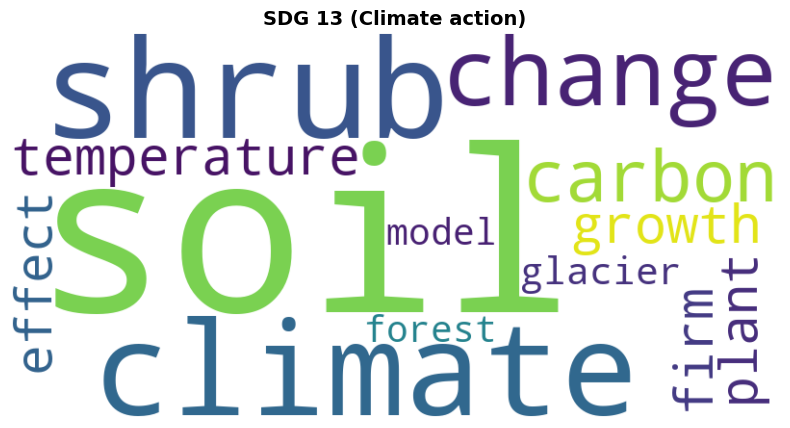

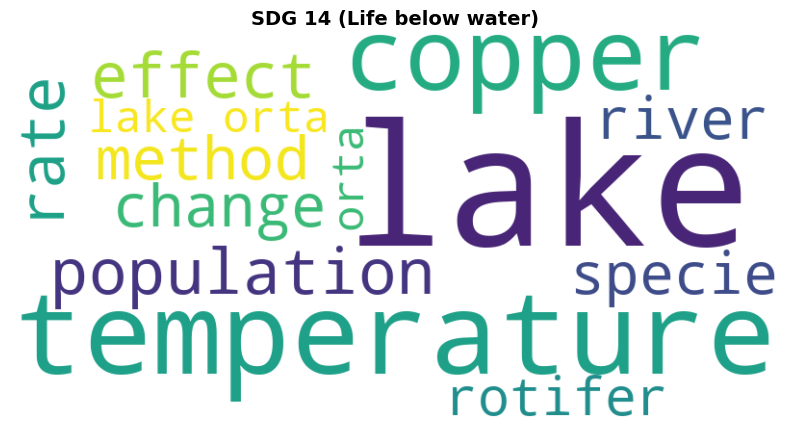

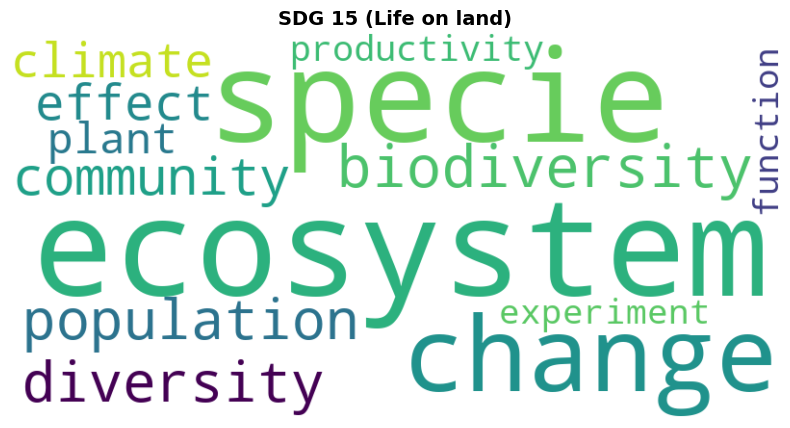

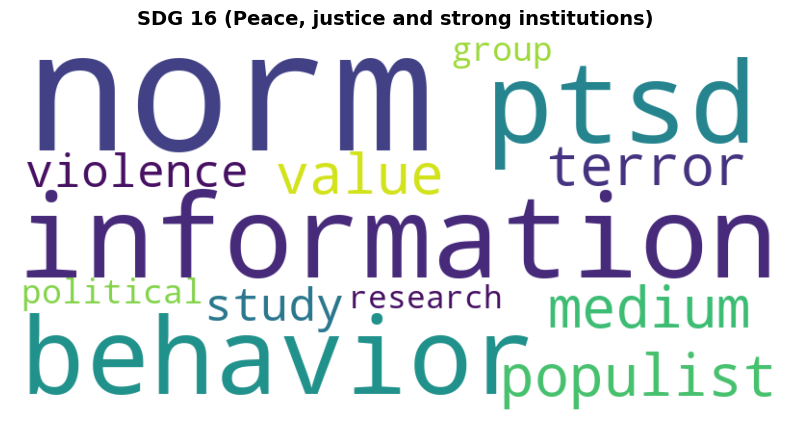

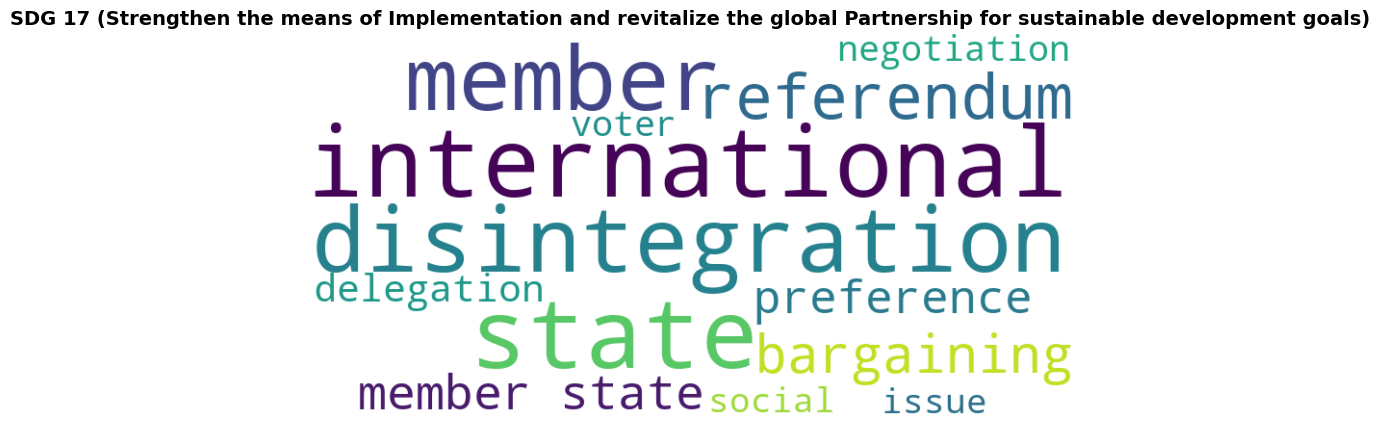

In [8]:
df_train['text_processed'] = df_train['abstract'].apply(preprocess)

grouped = df_train.groupby('sdg')

top_words_per_sdg_train = {}

for sdg, group in grouped:
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(group['text_processed'])

    # Apply NMF to extract topics
    nmf = NMF(n_components=1, random_state=42)
    nmf.fit(tfidf_matrix)

    # Extract features and weights
    feature_names = tfidf_vectorizer.get_feature_names_out()
    top_indices = nmf.components_[0].argsort()[:-13 - 1:-1]
    top_words = [feature_names[i] for i in top_indices]
    weights = nmf.components_[0][top_indices]

    word_freq = {word: weight for word, weight in zip(top_words, weights)}
    
    top_words_per_sdg_train[sdg] = top_words
    
    # Generate word clouds
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=50,
        relative_scaling=0.5
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"SDG {sdg} ({sdg_goals[sdg]})", fontsize=14, fontweight="bold")
    plt.axis("off")
    plt.show()

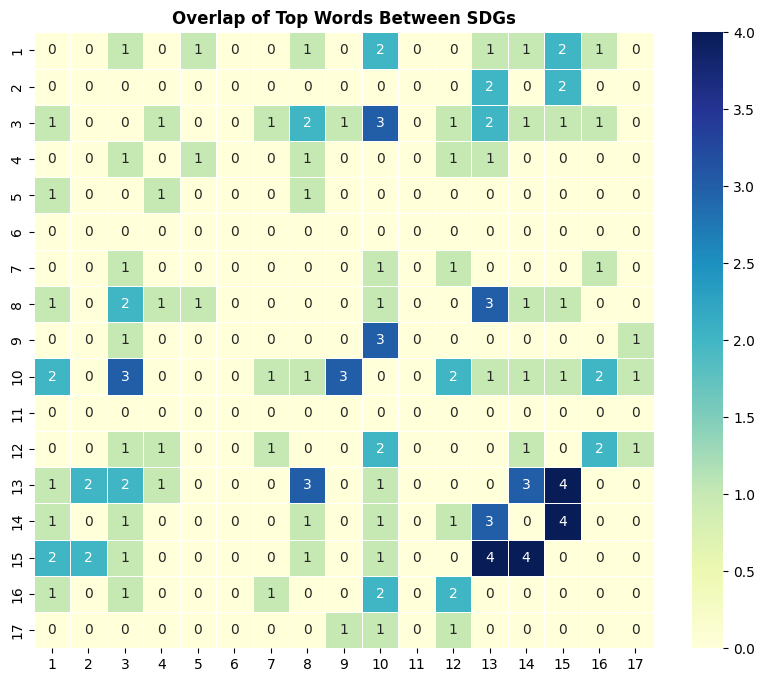

In [9]:
sdgs = list(top_words_per_sdg_train.keys())
overlap_matrix = pd.DataFrame(index=sdgs, columns=sdgs, dtype=object)

for sdg1 in sdgs:
    for sdg2 in sdgs:
        if sdg1 == sdg2:
            overlap_matrix.at[sdg1, sdg2] = None
        else:
            overlap_words = list(set(top_words_per_sdg_train[sdg1]) & set(top_words_per_sdg_train[sdg2]))
            overlap_matrix.at[sdg1, sdg2] = overlap_words

overlap_count_matrix = overlap_matrix.applymap(lambda x: len(x) if x is not None else 0)

plt.figure(figsize=(10, 8))
sns.heatmap(overlap_count_matrix, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Overlap of Top Words Between SDGs', fontweight="bold")
plt.show()

In [10]:
# Filter Null Label Dataset basis KeyWords in SDG Goals

In [11]:
null_labels = pd.read_csv("null_labels.csv")
null_labels["text_processed"] = null_labels["abstract"].apply(preprocess)

exclusion_words = set()
for val_train, val in zip(top_words_per_sdg_train.values(), top_words_per_sdg.values()):
    exclusion_words.update(val + val_train)

def count_exclusion_words(text_tokens, exclusion_words):
    return sum(token in exclusion_words for token in text_tokens.split(" ") if token.isalpha())

null_labels['sdg_relation'] = null_labels['text_processed'].apply(lambda tokens: count_exclusion_words(tokens, exclusion_words))
null_labels.sort_values(by="sdg_relation", ascending=False, inplace=True)

null_labels_clean = null_labels[null_labels.sdg_relation == 0]

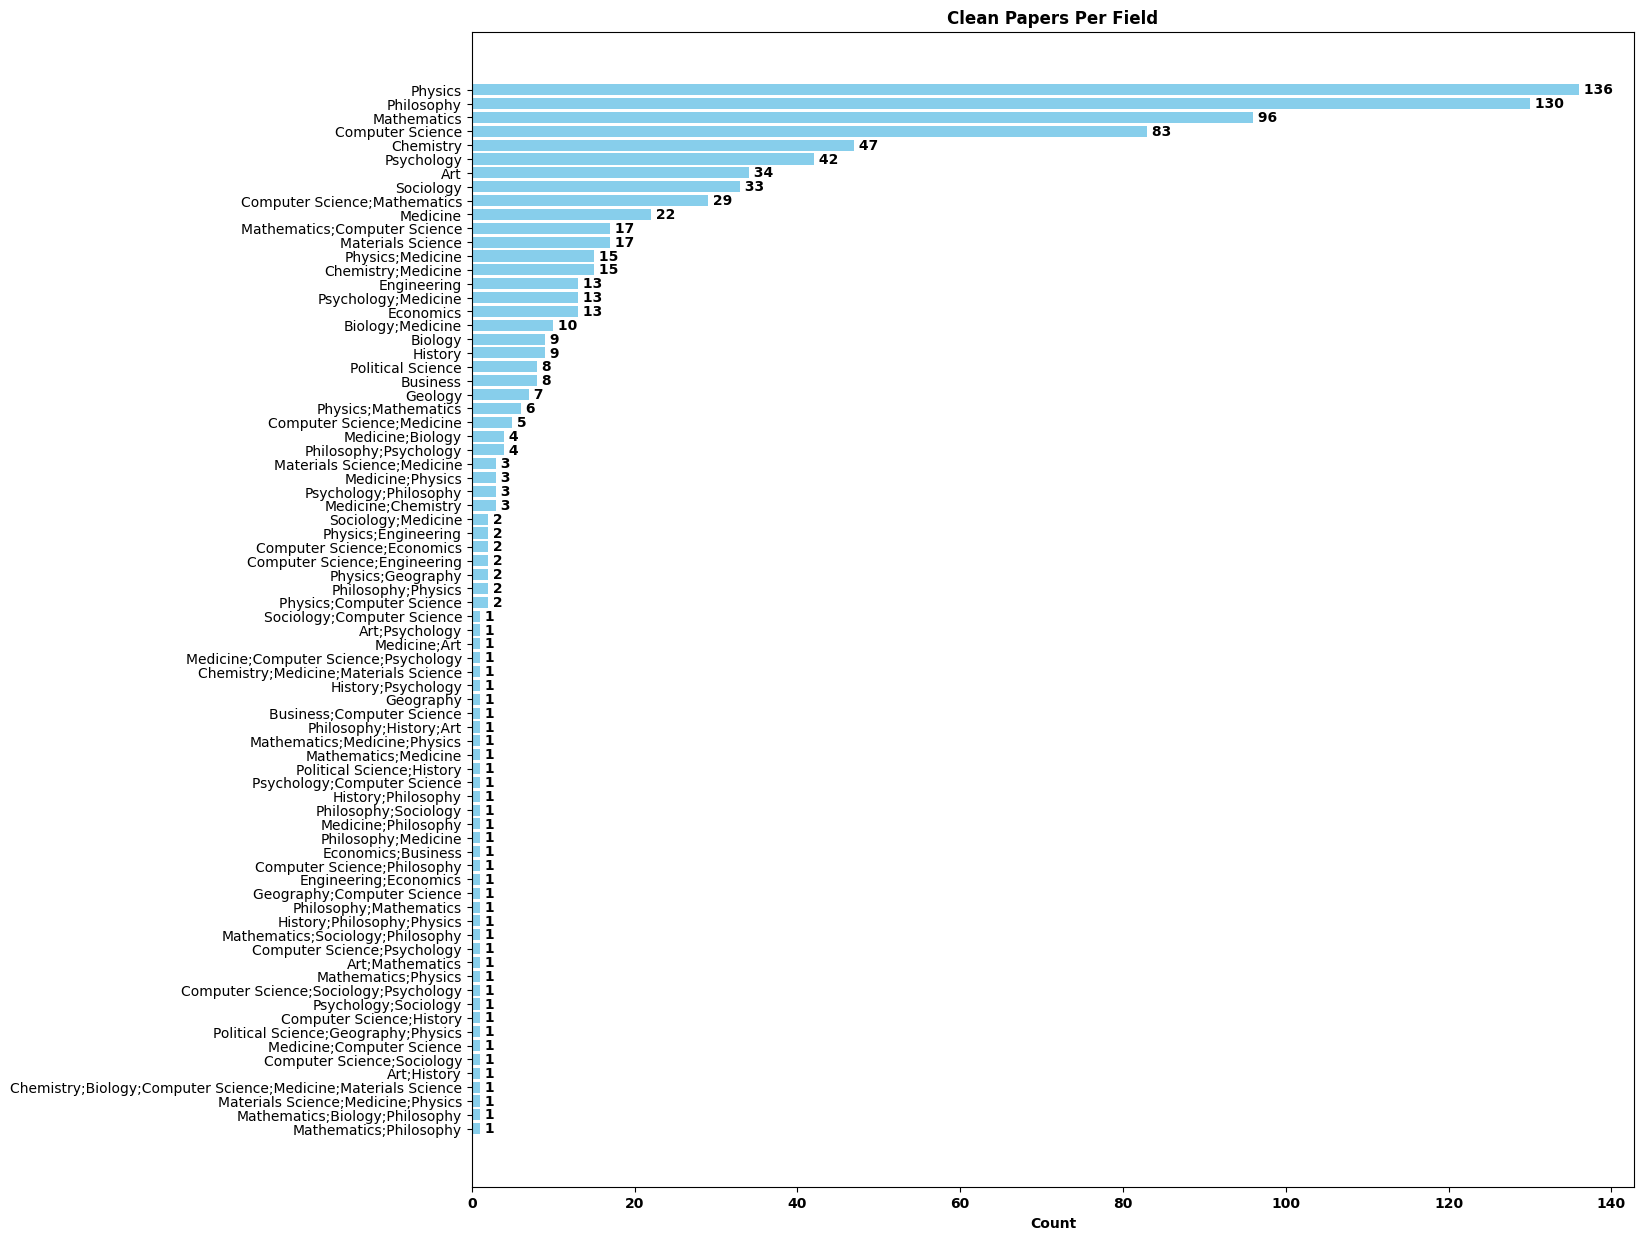

In [12]:
field_counts = null_labels_clean['field'].value_counts().sort_values()

plt.figure(figsize=(15, 15))
plt.barh(field_counts.index, field_counts.values, color='skyblue')

plt.xlabel('Count', fontweight="bold")
plt.xticks(fontweight="bold")
plt.title('Clean Papers Per Field', fontweight="bold")

for index, value in enumerate(field_counts.values):
    plt.text(value, index, f' {value}', va='center', ha='left', color='black', fontweight='bold')

plt.show()

In [13]:
null_labels_clean.to_csv("null_labels_clean_filtered_by_agreement.csv")

In [14]:
len(null_labels_clean)

937

In [32]:
##################################
###### Heuristic Labeling ########
##################################

In [30]:
def count_exclusion_words(text_tokens, exclusion_words):
    return sum(token in exclusion_words for token in text_tokens.split(" ") if token.isalpha())

for sdg, words in top_words_per_sdg.items():
    col_name = f'sdg_relation_{sdg}'
    null_labels[col_name] = null_labels['text_processed'].apply(lambda tokens: count_exclusion_words(tokens, set(words)))

sdg_columns = [f'sdg_relation_{sdg}' for sdg in top_words_per_sdg.keys()]
null_labels['sdg_relation_sum'] = null_labels[sdg_columns].sum(axis=1)

null_labels['sdg_verdict'] = null_labels[sdg_columns].idxmax(axis=1)
null_labels['sdg_weight'] = null_labels.apply(lambda row: row[row['sdg_verdict']] / row['sdg_relation_sum'] if row['sdg_relation_sum'] > 0 else 0, axis=1)
null_labels['sdg_verdict'] = null_labels['sdg_verdict'].str.replace('sdg_relation_', '').astype(int)

null_labels.sort_values(by=["sdg_weight"], ascending=False, inplace=True)

labeled_from_null_class = null_labels[null_labels.sdg_weight == 1]

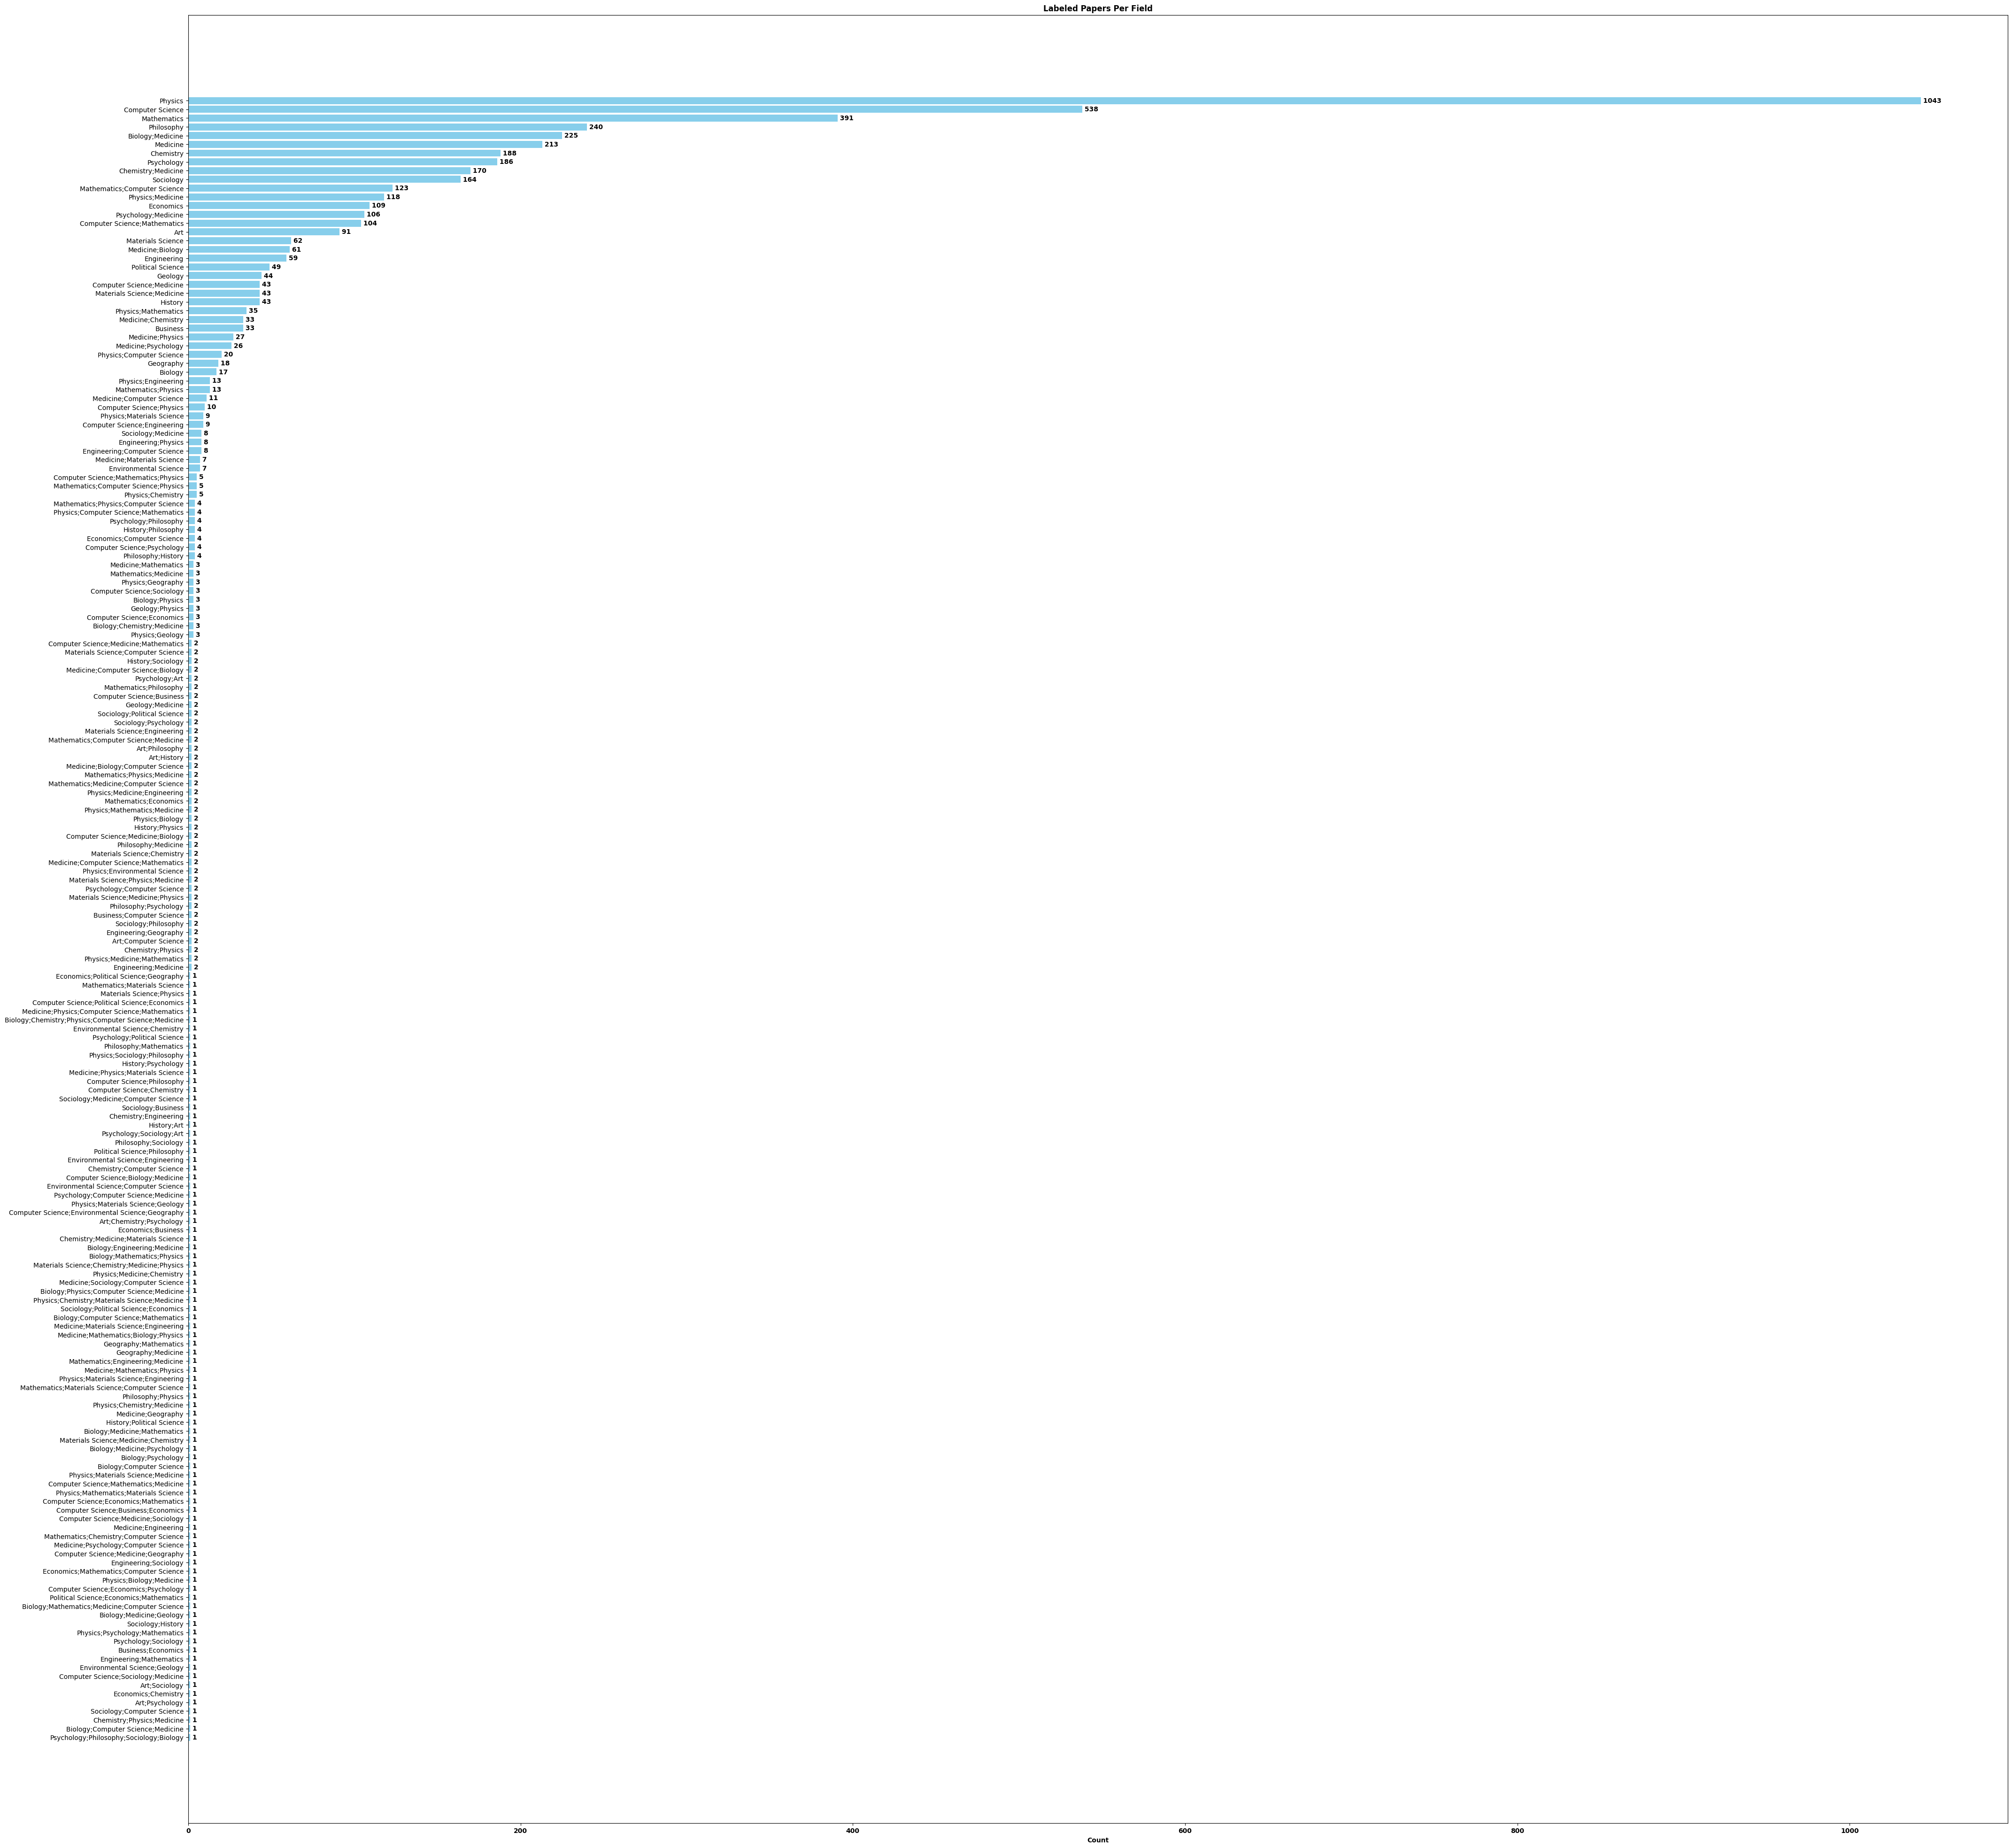

In [34]:
field_counts_labeled = labeled_from_null_class['field'].value_counts().sort_values()

plt.figure(figsize=(50, 50))
plt.barh(field_counts_labeled.index, field_counts_labeled.values, color='skyblue')

plt.xlabel('Count', fontweight="bold")
plt.xticks(fontweight="bold")
plt.title('Labeled Papers Per Field', fontweight="bold")

for index, value in enumerate(field_counts_labeled.values):
    plt.text(value, index, f' {value}', va='center', ha='left', color='black', fontweight='bold')

plt.show()

In [38]:
labeled_from_null_class[["id", "title", "abstract", "field", "sdg_verdict", "sdg_weight"]].to_csv("labeled_null_class.csv")

In [40]:
len(labeled_from_null_class)

5140

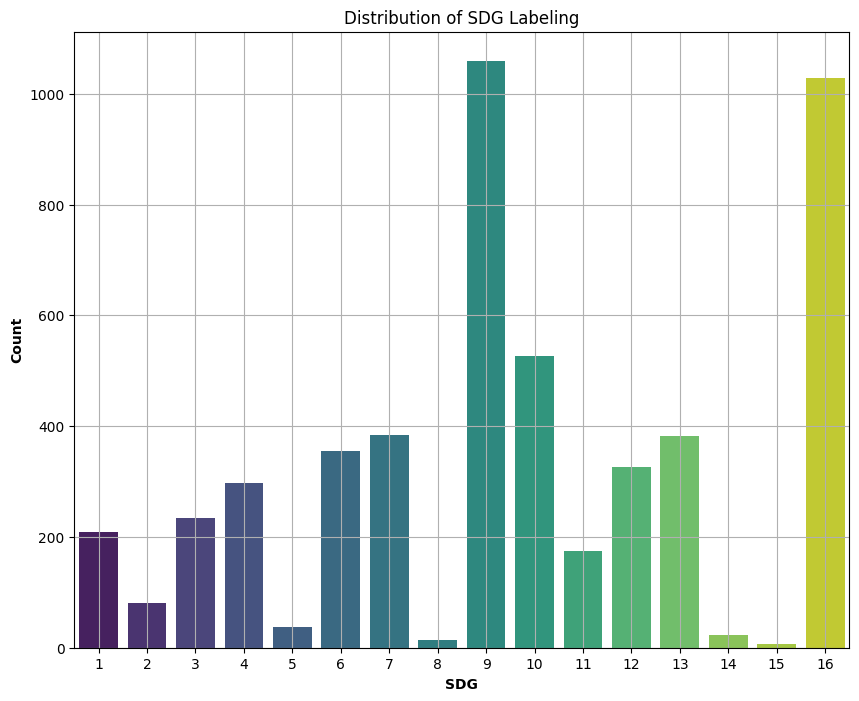

In [49]:
plt.figure(figsize=(10, 8))
sns.barplot(x=sdg_count.index, y=sdg_count.values, palette='viridis')

plt.xlabel('SDG', fontweight="bold")
plt.ylabel('Count', fontweight="bold")
plt.title('Distribution of SDG Labeling')
plt.grid(True)

plt.show()